In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import gseapy as gp
from tqdm import tqdm
from adjustText import adjust_text
import seaborn as sns
import anndata

def plot_gene_expression(anndata, batchID, genes,cmap='viridis',save_path=None,vmax=None,background='black'):
    """
    Plots the expression of a list of genes on a black background for a specified batchID.

    Parameters:
    - anndata: AnnData object containing the data.
    - batchID: The batchID to subset the data by.
    - genes: List of genes to iterate through and plot their expression.
    """
    # Subset the data based on the batchID
    subset_data = anndata[anndata.obs.batchID == batchID]
    # Loop through each gene in the genes list and create a plot
    for gene in genes:
        fig, ax = plt.subplots(figsize=(14, 14))
        ax.set_facecolor(background)  # Set the background to black
        
        if vmax:
            sc.pl.spatial(
            subset_data,
            color=gene,  # Plot the expression of the current gene
            cmap=cmap,  # Color map for better contrast on a black background
            spot_size=15,
            ax=ax,
            vmax=vmax
            )
        else:   
            # Plot the spatial data with the current gene expression
            sc.pl.spatial(
            subset_data,
            color=gene,  # Plot the expression of the current gene
            cmap=cmap,  # Color map for better contrast on a black background
            spot_size=15,
            ax=ax
            )
        if save_path:
            fig.savefig(f"{save_path}{gene}.pdf", format='pdf')
            
def shifted_colormap(base_cmap, midpoint=0.5, name='shifted_cmap'):
    """
    Shifts the center of a colormap.
    
    Parameters:
        base_cmap: Colormap to adjust.
        midpoint: The new center for the colormap (0.0 to 1.0).
        name: Name of the new colormap.
        
    Returns:
        A shifted colormap.
    """
    cdict = {'red': [], 'green': [], 'blue': [], 'alpha': []}
    
    # Regular index to shifted index
    reg_index = np.linspace(0, 1, 256)
    shift_index = np.hstack([
        np.linspace(0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1, 128)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = plt.cm.get_cmap(base_cmap)(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    return LinearSegmentedColormap(name, cdict)

In [2]:
adata = sc.read_h5ad('ABC_cleaned.h5ad')
adata_HQ = adata[adata.obs.subclass_label_confidence > 0.5]

adata_HQ.X = adata_HQ.layers['counts'].toarray().copy()
sc.pp.normalize_total(adata_HQ)
sc.pp.log1p(adata_HQ)


Cerebellum = adata_HQ[(adata_HQ.obs.Brain_Region == 'Cerebellum') & (adata_HQ.obs.adjusted_subclass_label_confidence > 0.5)].copy()
Hippocampus = adata_HQ[(adata_HQ.obs.Brain_Region == 'Hippocampus')& (adata_HQ.obs.adjusted_subclass_label_confidence > 0.5)].copy()
interest = ['Cxcl2','Slamf9','Cdk2', 'Atp2a3', 'Arhgap5']
cmap = sns.blend_palette(["gainsboro", sns.xkcd_rgb["black"]], as_cmap=True)

/oak/stanford/groups/quake/doug/resources/miniconda3/envs/Vizgen_2/lib/python3.9/site-packages/anndata/_core/anndata.py:618: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/oak/stanford/groups/quake/doug/resources/miniconda3/envs/Vizgen_2/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


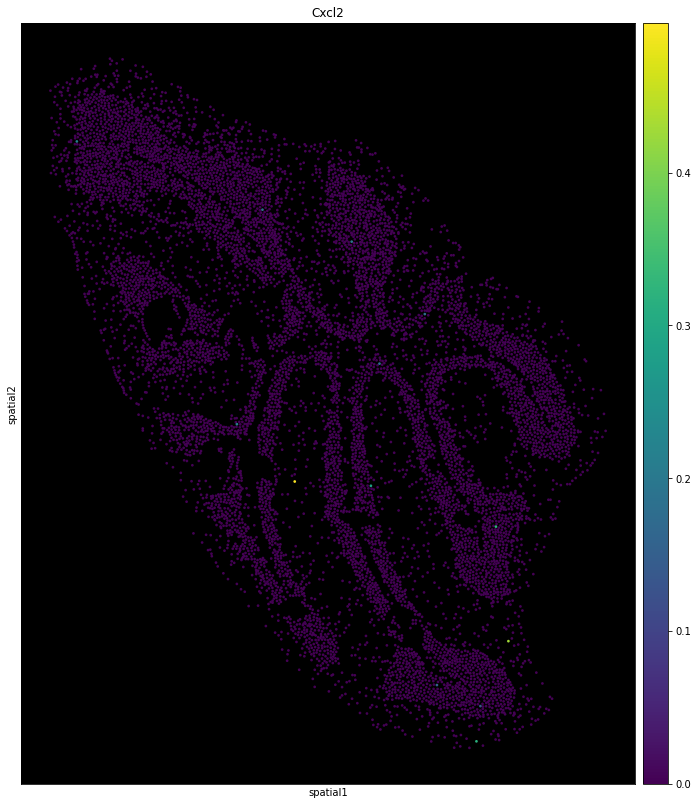

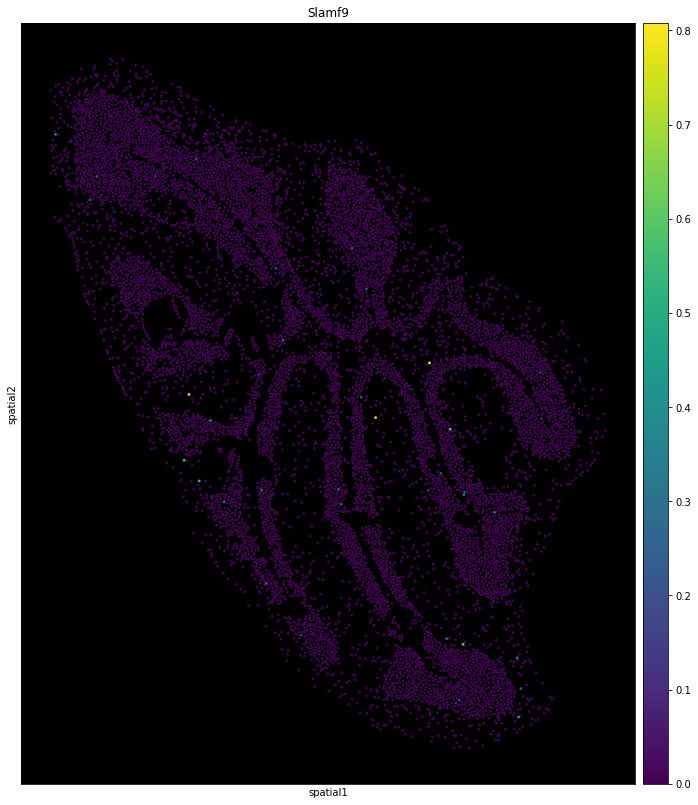

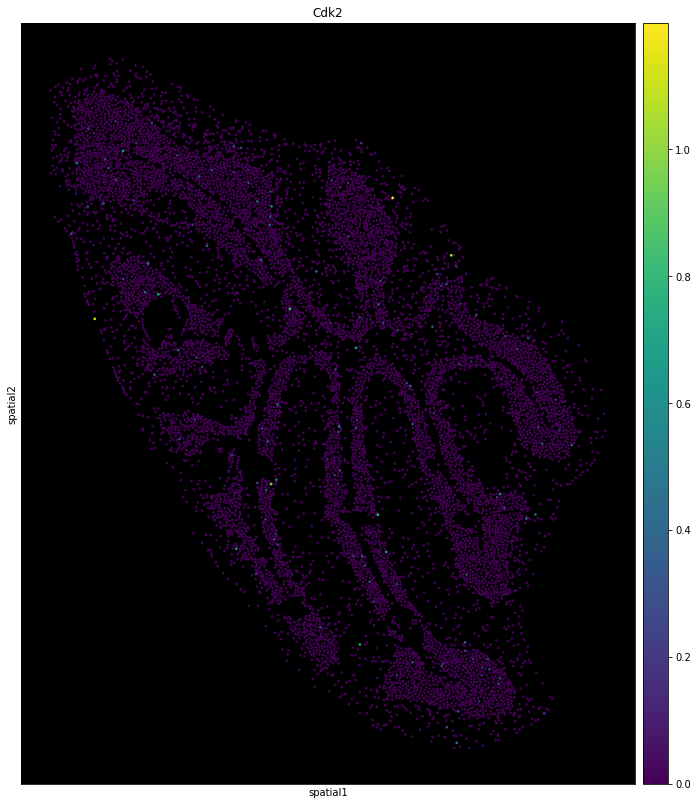

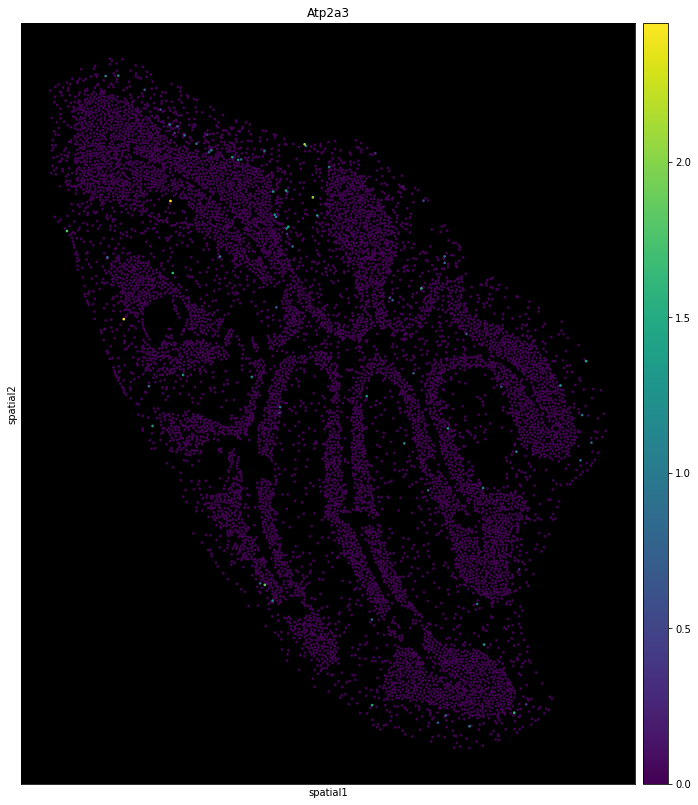

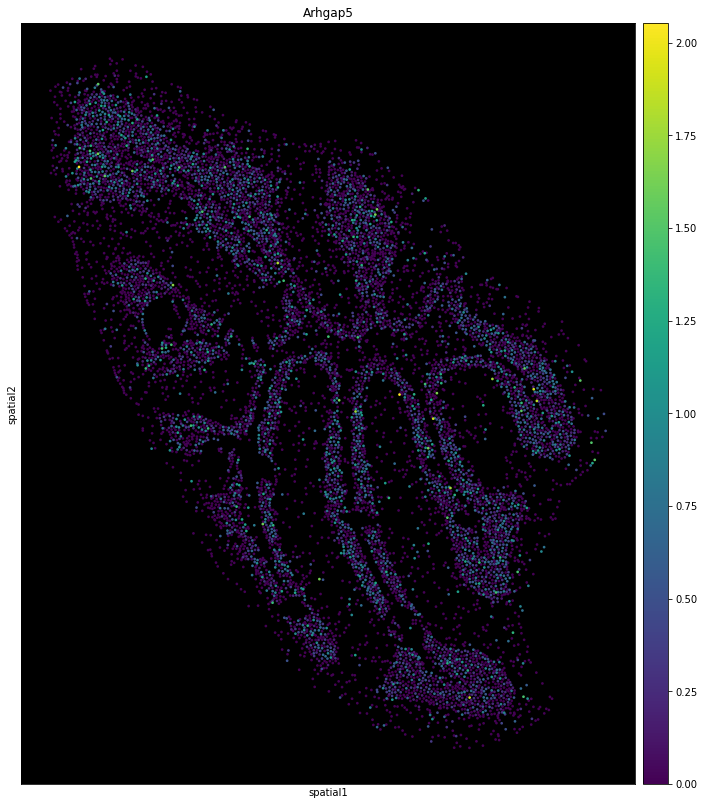

In [3]:
plot_gene_expression(Cerebellum, '3-mo-female-1-rev2', interest,cmap='viridis',save_path='figures/3m_CB/')

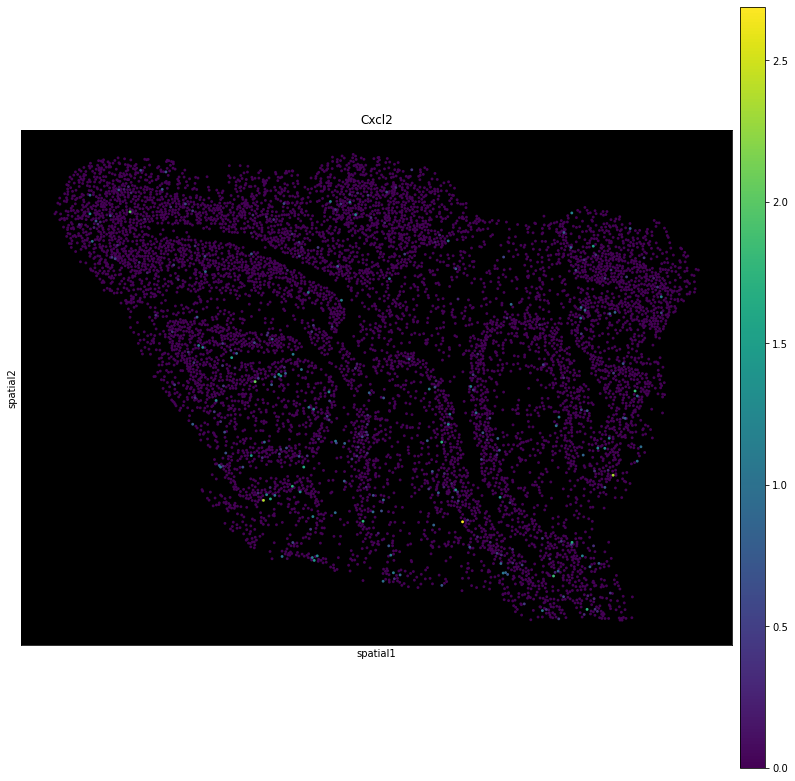

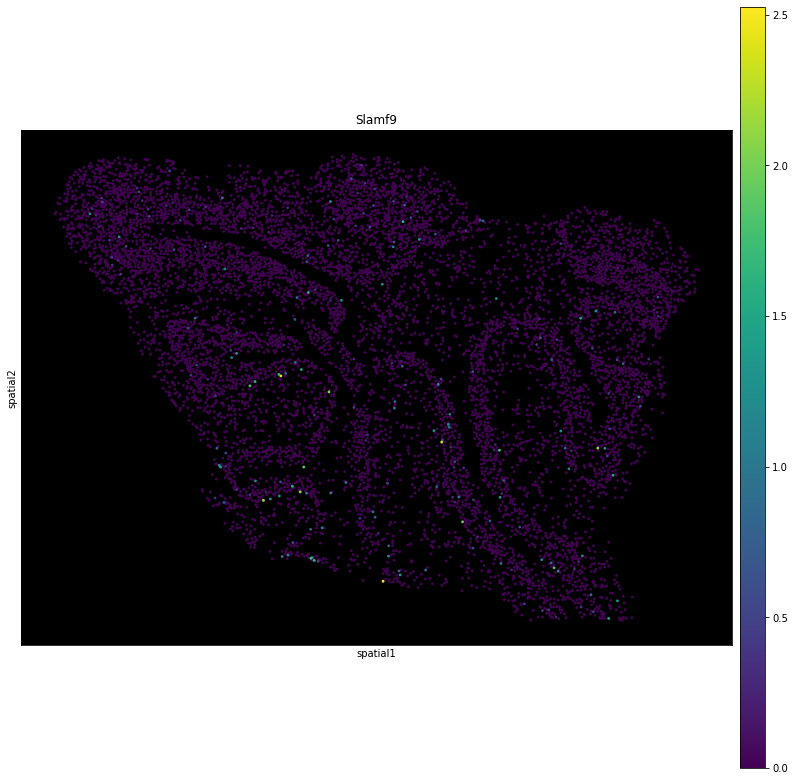

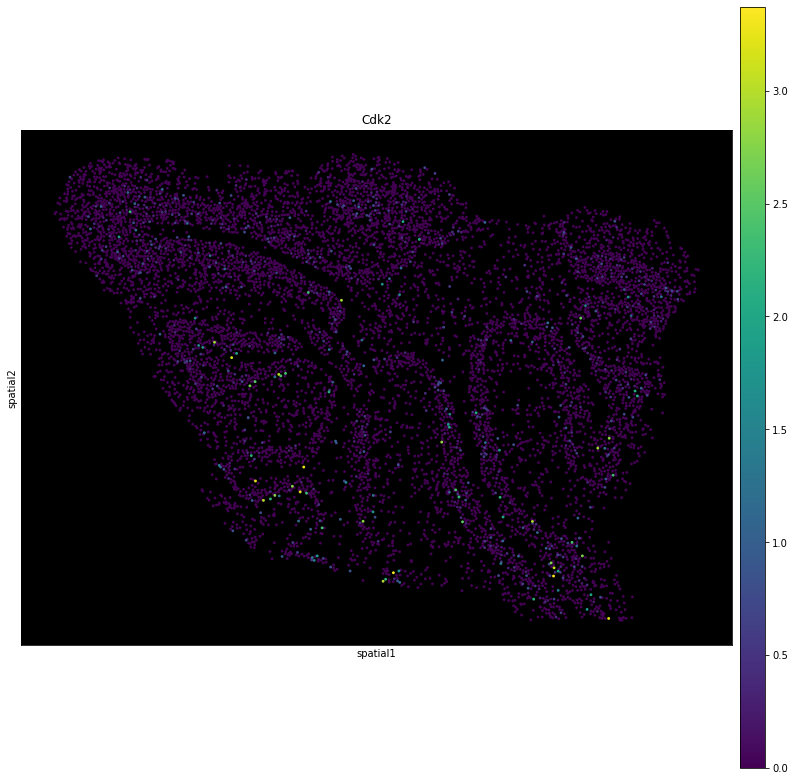

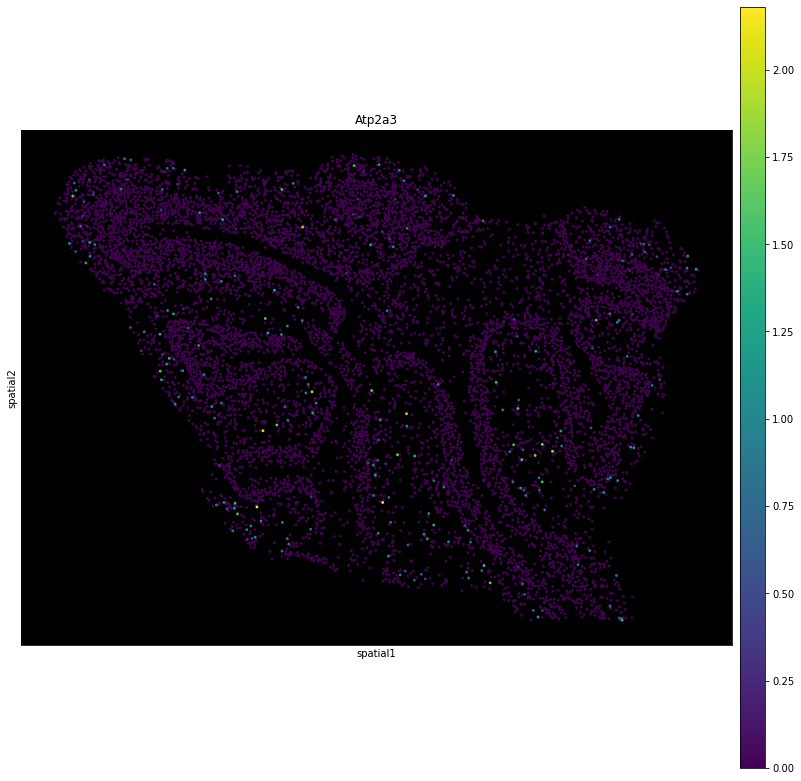

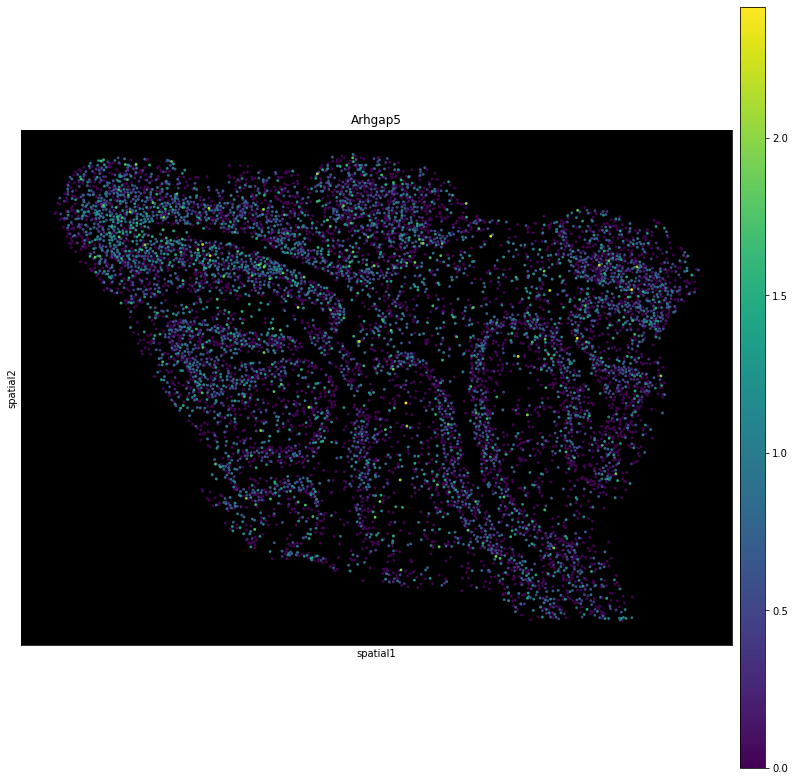

In [4]:
plot_gene_expression(Cerebellum, '24-mo-female-5', interest,cmap='viridis',save_path='figures/24m_CB/')

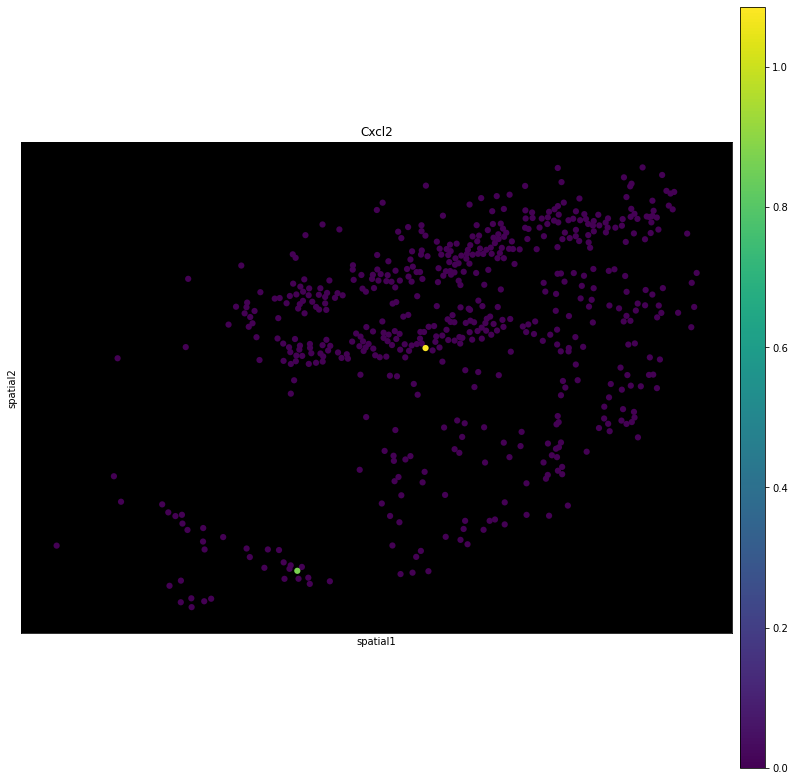

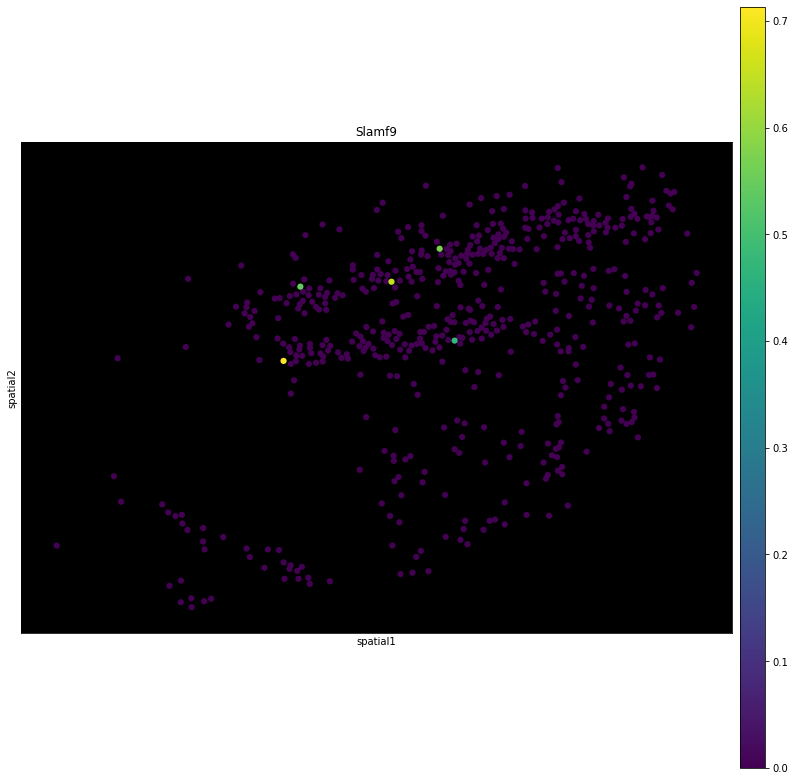

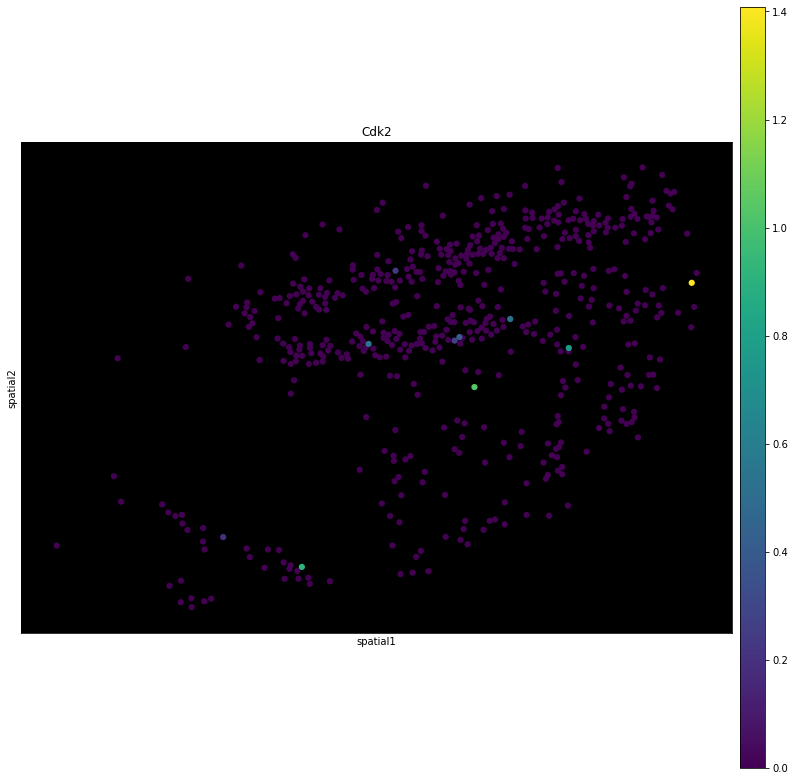

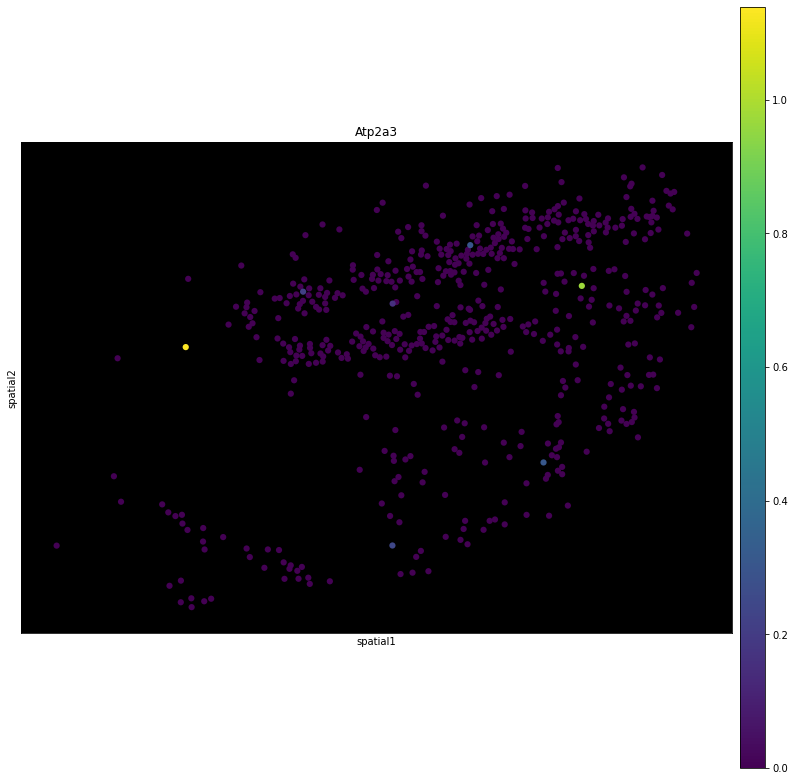

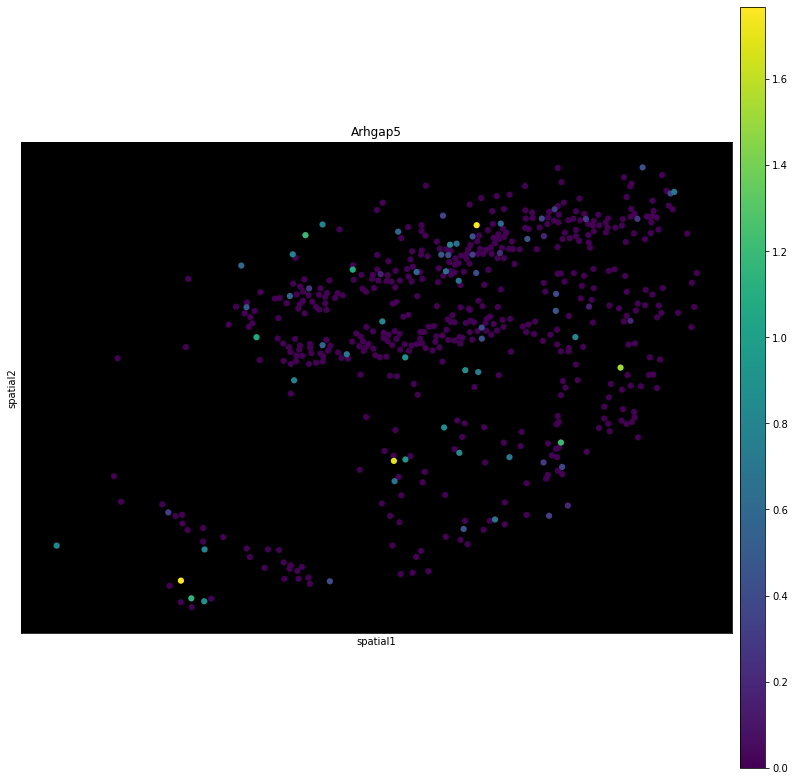

In [5]:
plot_gene_expression(Hippocampus, '3-mo-female-2', interest,cmap='viridis',save_path='figures/3m_HP/')

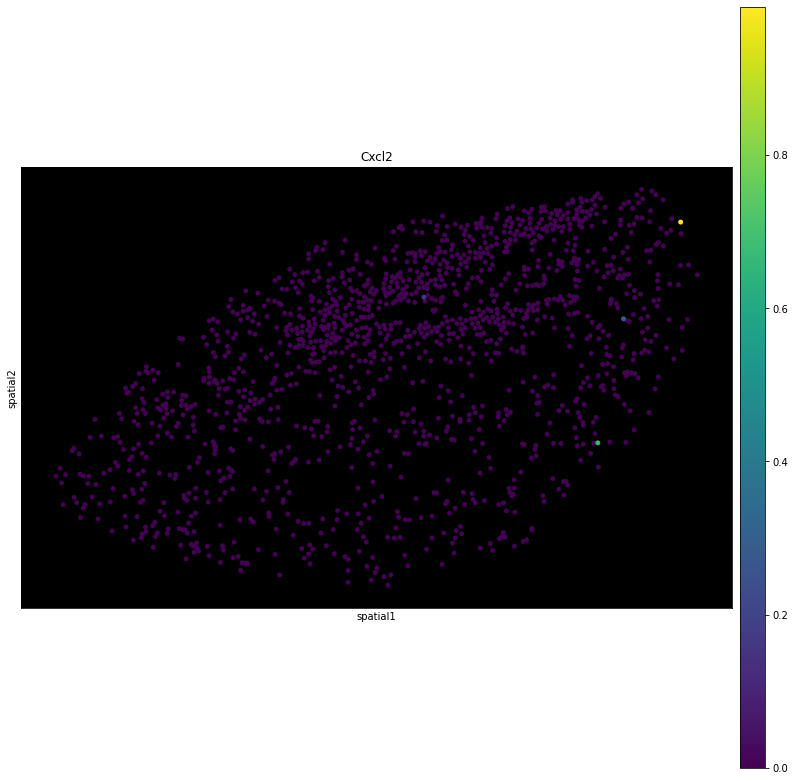

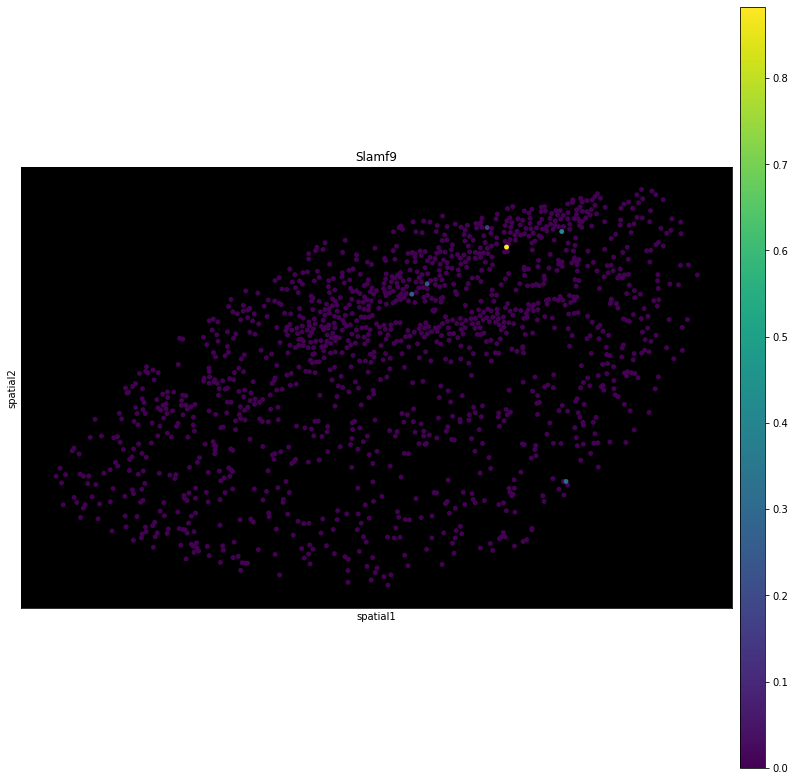

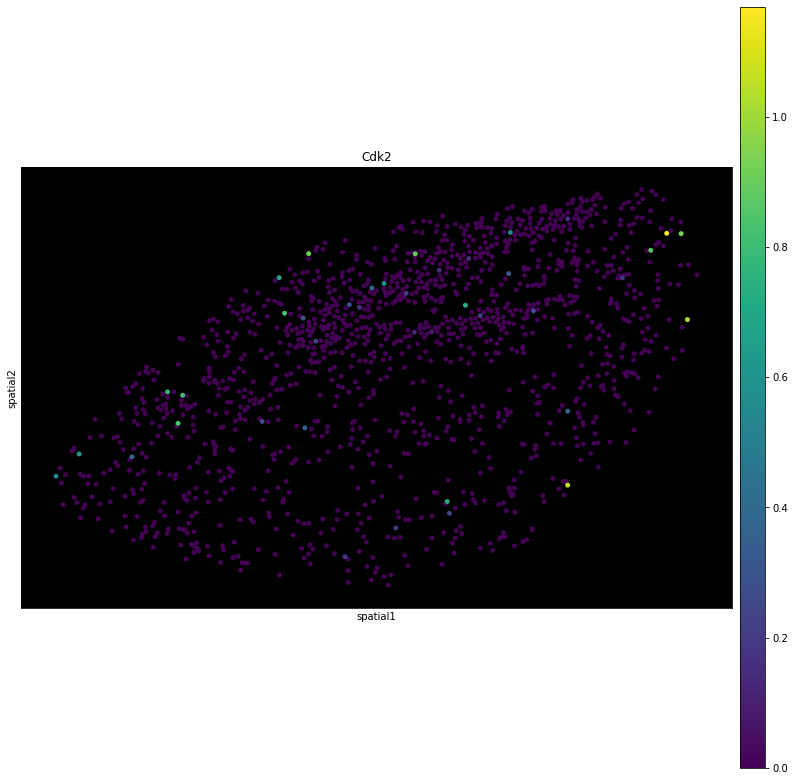

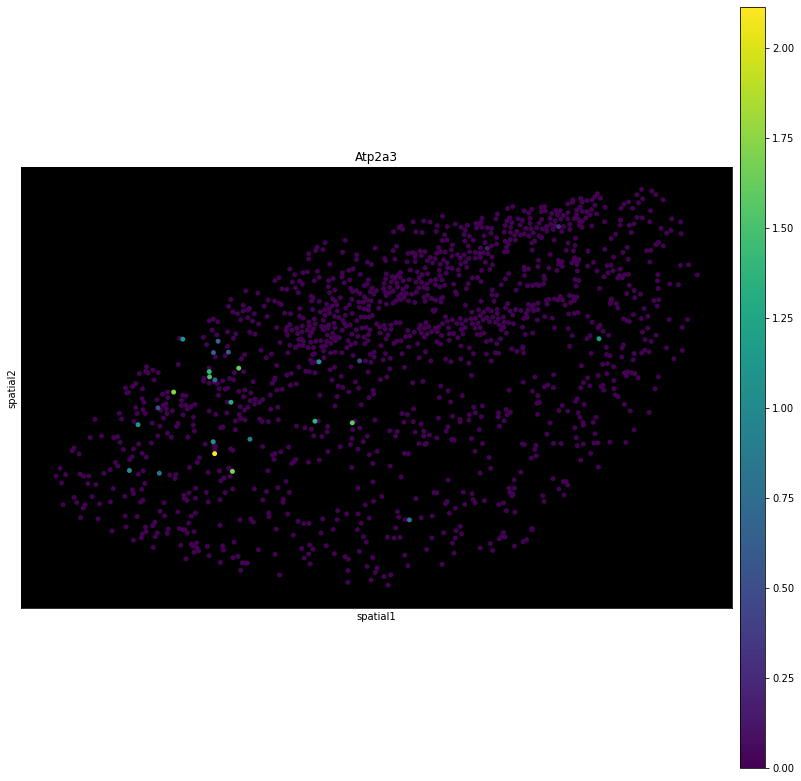

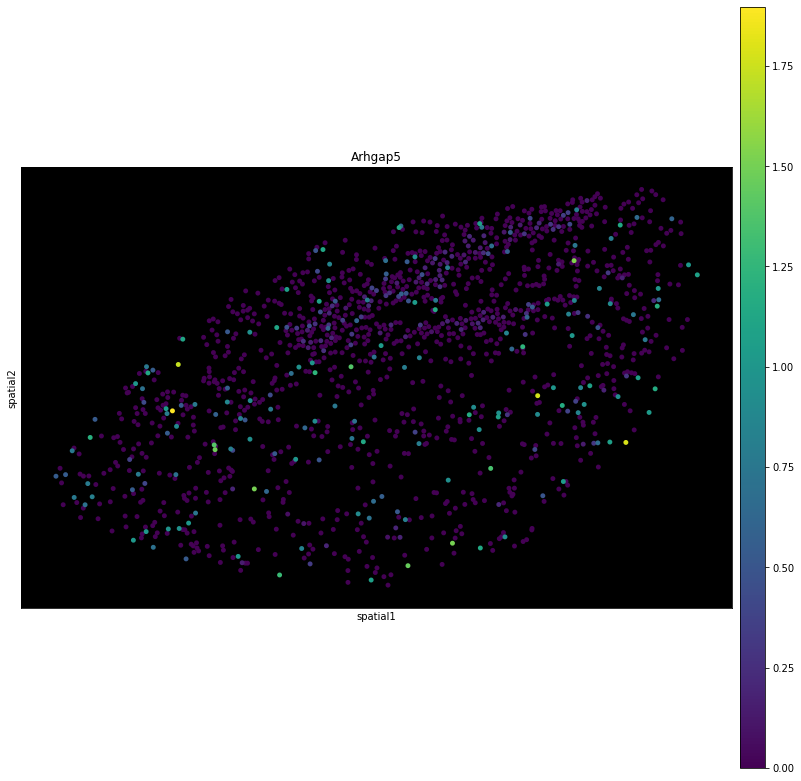

In [6]:
plot_gene_expression(Hippocampus, '24-mo-female-3', interest,cmap='viridis',save_path='figures/24m_HP/')

# Module Scoring: Granule Influence

In [7]:
sc.pp.scale(Cerebellum,max_value=10)
sc.pp.scale(Hippocampus,max_value=10)

sc.tl.score_genes(Cerebellum, gene_list=interest, score_name='activation')
sc.tl.score_genes(Hippocampus, gene_list=interest, score_name='activation')

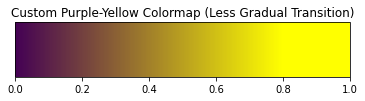

In [8]:
viridis_base_purple = '#440154'  # Hex code for the base purple in viridis

# Create a custom colormap with less gradual transition
# The first value '0.0' maps to purple, '0.7' stays closer to purple, and '1.0' is yellow
purple_yellow_cmap = LinearSegmentedColormap.from_list(
    'PurpleYellow', 
    [(0.0, viridis_base_purple), (0.8, 'yellow'), (1.0, 'yellow')]
)

# Example visualization
fig, ax = plt.subplots(figsize=(6, 1))
plt.colorbar(plt.cm.ScalarMappable(cmap=purple_yellow_cmap), cax=ax, orientation='horizontal')
plt.title('Custom Purple-Yellow Colormap (Less Gradual Transition)')
plt.show()

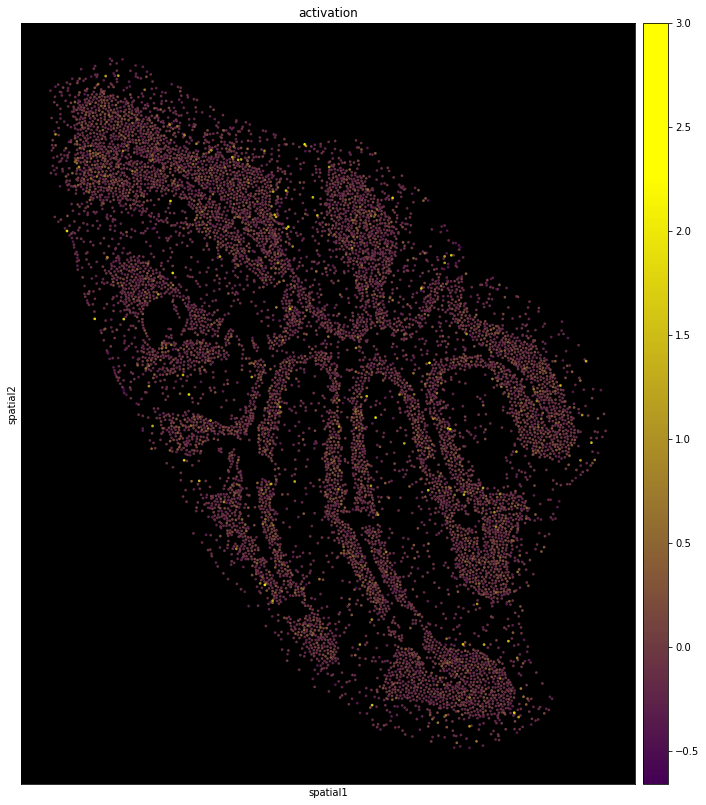

In [9]:
plot_gene_expression(Cerebellum, '3-mo-female-1-rev2', ['activation'],cmap=purple_yellow_cmap,vmax=3,save_path='figures/3m_CB_score/')

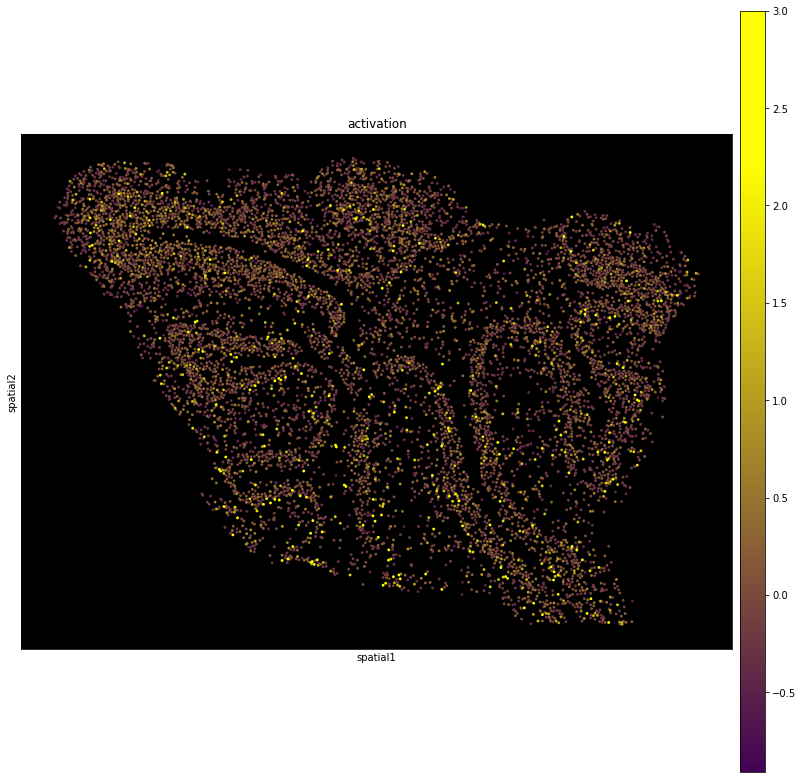

In [10]:
plot_gene_expression(Cerebellum, '24-mo-female-5', ['activation'],cmap=purple_yellow_cmap,vmax=3,save_path='figures/24m_CB_score/',background='black')

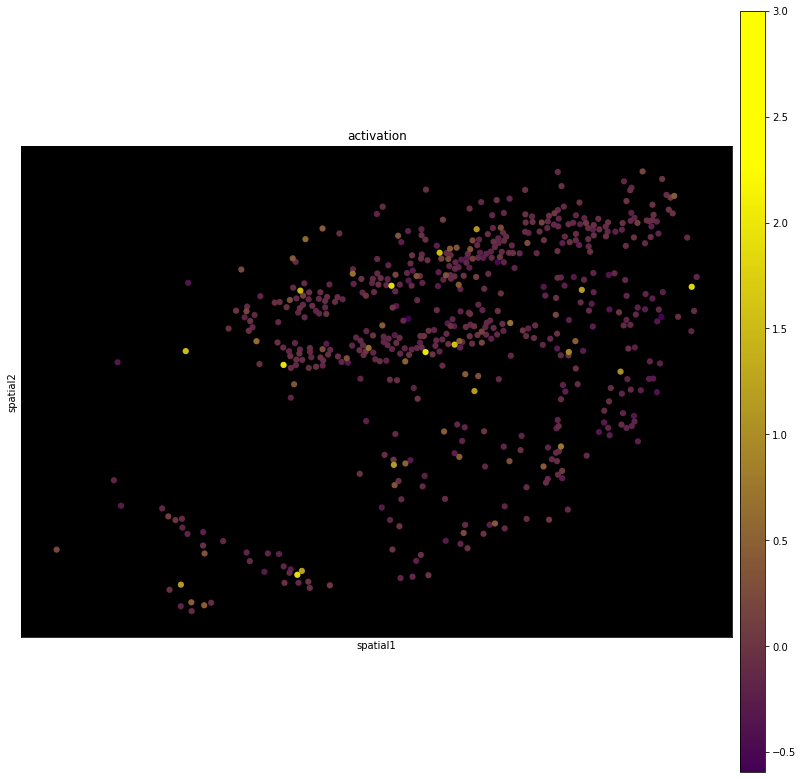

In [11]:
plot_gene_expression(Hippocampus, '3-mo-female-2', ['activation'],cmap=purple_yellow_cmap,vmax=3,save_path='figures/3m_HP_score/')

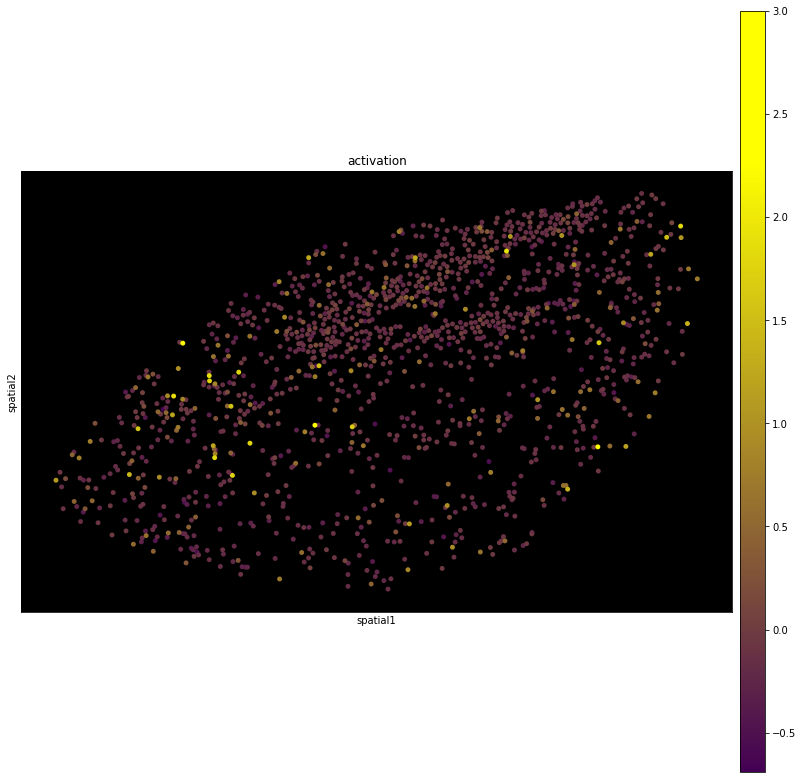

In [12]:
plot_gene_expression(Hippocampus, '24-mo-female-3', ['activation'],cmap=purple_yellow_cmap,vmax=3,save_path='figures/24m_HP_score/')